# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [10]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import palmerpenguins as pp

In [12]:
# Code Here
df_penguins = pp.load_penguins()
df_dummies = pd.get_dummies(df_penguins).dropna()
df_dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model
`
Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Linear

In [13]:
from sklearn.linear_model import LinearRegression

# Prepare X and y
X = df_dummies.drop(columns=['bill_depth_mm'])
y = df_dummies['bill_depth_mm']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Best Linear Model: Linear Regression with All Predictors
linear_model = LinearRegression()

# Fit on training data
linear_model.fit(X_train, y_train)

# Evaluate on training and test sets
train_lr_r2 = linear_model.score(X_train, y_train)
test_lr_r2 = linear_model.score(X_test, y_test)

print("Model 4 (All Predictors)")
print(f"Training R²: {train_lr_r2:.4f}")
print(f"Test R²: {test_lr_r2:.4f}")

Model 4 (All Predictors)
Training R²: 0.8381
Test R²: 0.8646


## KNN

In [14]:
# Prepare X (features) and y (target)
X = df_dummies.drop(columns=['bill_depth_mm'])
y = df_dummies['bill_depth_mm']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: 
knn_5 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])


# Model 2: kNN with K=15
knn_15 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=15))
])

# Fit on training data
knn_5.fit(X=X_train, y=y_train)

# Predict on test data
y_pred_train_knn5 = knn_5.predict(X_train)
y_pred_test_knn5 = knn_5.predict(X_test)

# This automatically calculates R²
train_r2 = knn_5.score(X_train, y_train)  # R² on training data
test_r2 = knn_5.score(X_test, y_test)      # R² on test data

print(f"Training R² for k = 5: {train_r2:.4f}")
print(f"Test R² for k = 5: {test_r2:.4f}")

# fit k = 15 model
knn_15.fit(X=X_train, y=y_train)

# Predict on test data
y_pred_train_knn15 = knn_15.predict(X_train)
y_pred_test_knn15 = knn_15.predict(X_test)

# This automatically calculates R²
train15_r2 = knn_15.score(X_train, y_train)  # R² on training data
test15_r2 = knn_15.score(X_test, y_test)      # R² on test data

print(f"Training R² for k = 15: {train15_r2:.4f}")
print(f"Test R² for k = 15: {test15_r2:.4f}")


Training R² for k = 5: 0.8823
Test R² for k = 5: 0.8257
Training R² for k = 15: 0.8423
Test R² for k = 15: 0.8483


## Decision Tree

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7]
}

# Create the decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² as the scoring metric
    return_train_score=True
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Print best parameters and cross-validation score
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

# Evaluate on training and test sets
train_dt_r2 = best_dt.score(X_train, y_train)
test_dt_r2 = best_dt.score(X_test, y_test)

print(f"Training R² for Decision Tree: {train_dt_r2:.4f}")
print(f"Test R² for Decision Tree: {test_dt_r2:.4f}")

# Display all results from GridSearch
print("GridSearch Results:")
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_max_depth', 'mean_train_score', 'mean_test_score']].to_string(index=False))

Best max_depth: 3
Best cross-validation R²: 0.8002
Training R² for Decision Tree: 0.8436
Test R² for Decision Tree: 0.8369
GridSearch Results:
 param_max_depth  mean_train_score  mean_test_score
               2          0.810665         0.791662
               3          0.847924         0.800186
               4          0.878551         0.784981
               5          0.906255         0.768540
               6          0.932359         0.730604
               7          0.958719         0.705632


# Model Comparison Plot

Create a plot showing training and test error for all four models.

Model Performance (Mean Squared Error):
                  Model  Train Error  Test Error
      Linear Regression     0.617576    0.562327
             kNN (k=15)     0.601702    0.629668
Decision Tree (depth=3)     0.596790    0.676979
              kNN (k=5)     0.449137    0.723414


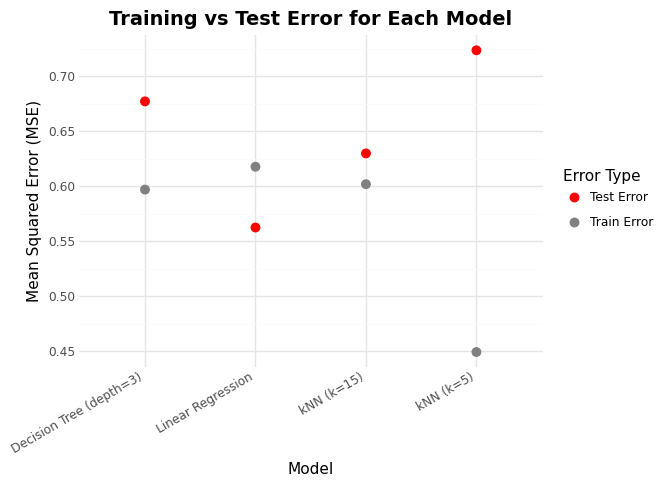

In [ ]:
from sklearn.metrics import mean_squared_error
from plotnine import *
import pandas as pd

# Calculate MSE for all four models
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN (k=15)', 'Decision Tree (depth=3)', 'kNN (k=5)'],
    'Train Error': [
        mean_squared_error(y_train, linear_model.predict(X_train)),
        mean_squared_error(y_train, knn_15.predict(X_train)),
        mean_squared_error(y_train, best_dt.predict(X_train)),
        mean_squared_error(y_train, knn_5.predict(X_train))
    ],
    'Test Error': [
        mean_squared_error(y_test, linear_model.predict(X_test)),
        mean_squared_error(y_test, knn_15.predict(X_test)),
        mean_squared_error(y_test, best_dt.predict(X_test)),
        mean_squared_error(y_test, knn_5.predict(X_test))
    ]
})

# Print results table
print("Model Performance (Mean Squared Error):")
print(results_df.to_string(index=False))

# Melt to long format
results_melted = results_df.melt(
    id_vars='Model',
    value_vars=['Train Error', 'Test Error'],
    var_name='Type',
    value_name='MSE'
)

# Create the plot
plot = (
    ggplot(results_melted, aes(x='Model', y='MSE', color='Type', group='Type')) +
    geom_point(size=3) +
    scale_color_manual(
        values={'Train Error': 'gray', 'Test Error': 'red'}
    ) +
    labs(
        title='Training vs Test Error for Each Model',
        x='Model',
        y='Mean Squared Error (MSE)',
        color='Error Type'
    ) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=30, ha='right'),
        plot_title=element_text(weight='bold', size=14)
    )
)

plot

In [18]:
print("mse linear: ", mean_squared_error(y_test, linear_model.predict(X_test)))
print("mse knn k=15: ", mean_squared_error(y_test, knn_15.predict(X_test)))
print("mse decision tree (depth 3): ", mean_squared_error(y_test, best_dt.predict(X_test)))
print("mse knn k=5: ", mean_squared_error(y_test, knn_5.predict(X_test)))

mse linear:  0.562326779792596
mse knn k=15:  0.6296682769726247
mse decision tree (depth 3):  0.676978713413404
mse knn k=5:  0.7234144927536235


# Best Model

My best model seems to be my original best linear model which included all predictors. This model has the largest R-squared at 0.8646 and lowest MSE of 0.5623 using the test data set.